## 5.6Áî®PyTorchÊûÑÂª∫Transformer-XL
‰ΩøÁî®ÁéØÂ¢ÉÔºöPython3.7+,einsum,PyTorch1+,GPUÊàñCPU  
ÂÖ∂‰∏≠einsumÔºàÁà±Âõ†ÊñØÂù¶Ê±ÇÂíåÁ∫¶ÂÆöÔºâÊòØ‰∏ÄÁßçÁî±Áà±Âõ†ÊñØÂù¶ÊèêÂá∫ÁöÑÔºåÂØπÂº†ÈáèËøêÁÆóÔºàÂÜÖÁßØ„ÄÅÂ§ñÁßØ„ÄÅËΩ¨ÁΩÆ„ÄÅÁÇπ‰πò„ÄÅÁü©ÈòµÁöÑËøπ„ÄÅÂÖ∂‰ªñËá™ÂÆö‰πâËøêÁÆóÔºâÁöÑ‰∏ÄÁßçÁÆÄËÆ∞Ê≥ï„ÄÇÂú®PyTorch„ÄÅnumpyÂíåTensorFlow‰πãÁ±ªÁöÑÊ∑±Â∫¶Â≠¶‰π†Â∫ì‰∏≠ÈÉΩÊúâÂÆûÁé∞ÔºåeinsumÂú®numpy‰∏≠ÂÆûÁé∞‰∏∫np.einsumÔºåÂú®PyTorch‰∏≠ÂÆûÁé∞‰∏∫torch.einsumÔºåÂú®TensorFlow‰∏≠ÂÆûÁé∞‰∏∫tf.einsum„ÄÇ
Êõ¥Â§öeinsum‰ø°ÊÅØÂèØÂèÇËÄÉÔºö  
ÔÅ¨	https://rockt.github.io/2018/04/30/einsum  
ÔÅ¨	https://pytorch.org/docs/master/generated/torch.einsum.html  

	Êú¨ËäÇÊàë‰ª¨Áî®PyTorch1.6ÁâàÊú¨ÂÆûÁé∞Transformer-XLÁöÑÊï¥‰∏™ËøáÁ®ãÔºåÈáçÁÇπÊòØÊûÑÂª∫Head Attention„ÄÇ‰∏∫‰æø‰∫éÂ§ßÂÆ∂Êõ¥Â•ΩÁêÜËß£ÔºåÊàë‰ª¨ÂÖà‰ªéÊûÑÂª∫‰∏Ä‰∏™ÁÆÄÂçïÁöÑHead AttentionÂºÄÂßãÔºåÁÑ∂ÂêéÊûÑÂª∫Â§öÂ§¥AttentionÔºåÊúÄÂêéÊûÑÂª∫Decoder„ÄÇÊ≥®ÊÑèÔºåËøôÈáåTransformer-XLÊ≤°Êúâ‰ΩøÁî®Encoder„ÄÇ

### 5.6.1ÊûÑÂª∫Âçï‰∏™Head Attention
	Êàë‰ª¨Â∞Ü‰ªéÂÆûÁé∞Âçï‰∏™HeadAttentionÂºÄÂßã„ÄÇ‰∏∫‰∫Ü‰Ωø‰∫ãÊÉÖÂÖ∑‰ΩìÔºåËÆ©Êàë‰ª¨ËÄÉËôëÁ¨¨‰∏ÄÂ±ÇÂπ∂ÂÅáËÆæÊé•Êî∂Âà∞ÂΩ¢Áä∂‰∏∫Ôºàseq = 7Ôºåbatch_size = 3Ôºåembedding_dim = 32ÔºâÁöÑÂçïËØçÂµåÂÖ•„ÄÇ‰∏∫ÁÆÄ‰æøËµ∑ËßÅÔºåÂú®ËæìÂÖ•‰∏≠ÂÖà‰∏çÊ∑ªÂä†‰ΩçÁΩÆÁºñÁ†ÅÔºåÂú®8ÔºâÊ≠•Â∞ÜÂä†ÂÖ•ÔºåÂÖ∑‰ΩìËØ∑ÂèÇËÄÉ‰π¶‰∏≠ÁöÑÂºèÔºà5.30Ôºâ„ÄÇ
1ÔºâÂØºÂÖ•ÈúÄË¶ÅÁöÑÂ∫ì

In [2]:
from typing import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")

ÁÆÄÂçïÂõûÈ°æTransformerÊû∂ÊûÑ
TransformerÊû∂ÊûÑÂõæ
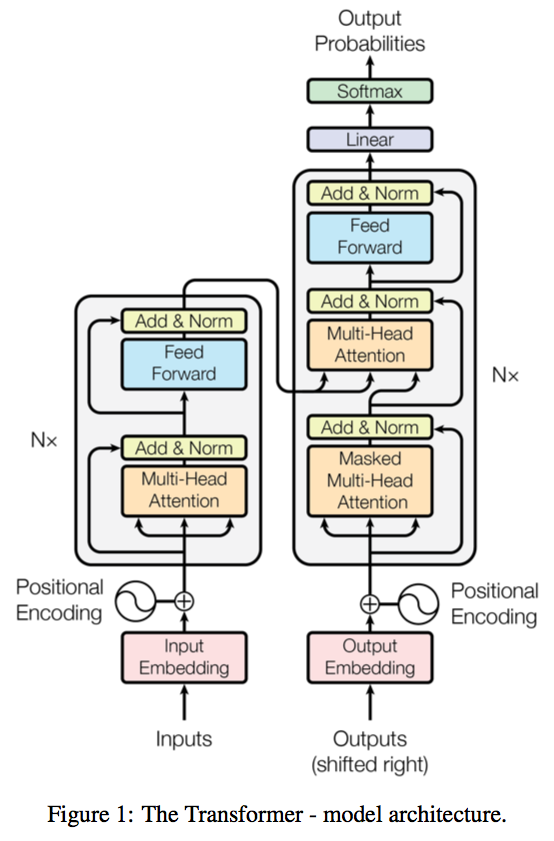

Â§öÂ§¥AttentionÁªìÊûÑÂõæ
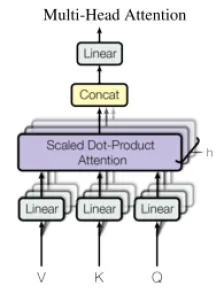

Êé•‰∏ãÊù•Êàë‰ª¨Â∞ÜÈÄöËøá‰ª•‰∏ãÊñπÂºèÊûÑÂª∫Transformer XLÔºö  
È¶ñÂÖàÂÆûÁé∞Âçï‰∏™Head-AttentionÔºåÂØπÂÖ∂ËøõË°åÁº©Êîæ‰ª•ÊûÑÊàêTransformer XLÁöÑMultiHeadAttentionÂ±ÇÔºå  
ÁÑ∂ÂêéÊûÑÂª∫DecoderBlockÂπ∂Â∞ÜÂÖ∂Â†ÜÂè†‰ª•ÂàõÂª∫ÂÆåÊï¥ÁöÑTransformer XL„ÄÇ

2ÔºâÂàõÂª∫‰∏ÄÂ∫èÂàóÁöÑËØçÂµåÂÖ•

In [4]:
seq, batch_size, embedding_dim = 7, 3, 32

In [5]:
word_embs = torch.rand(seq, batch_size, embedding_dim)

In [6]:
word_embs.shape

torch.Size([7, 3, 32])

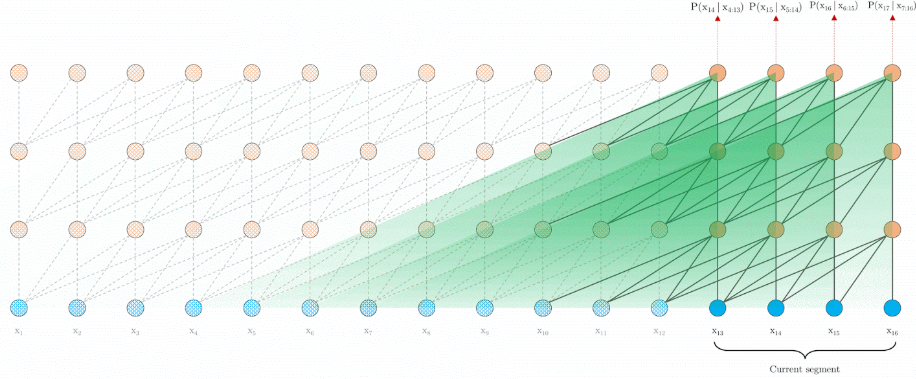

3ÔºâÂàõÂª∫ËØ•Â∫èÂàóÁöÑÂâçÂ∫èÂàó„ÄÇ  
‰∏∫‰∫Ü‰ΩøÊõ¥ÂÖ∑‰∏ÄËà¨ÊÄßÔºåÂÅáËÆæ‰πãÂâçÁöÑÂ∫èÂàóÈïøÂ∫¶‰∏∫prev_seq = 6

In [7]:
prev_seq = 6
memory = torch.rand(prev_seq, batch_size, embedding_dim) # ‰ªéÂâçseqËé∑ÂèñÈöêÂê´Áä∂ÊÄÅ

ÊØè‰∏™head attentionÁöÑËæìÂÖ•‰∏∫keys„ÄÅqueries„ÄÅvalues ÔºåÂÖ∑‰ΩìÂ§ÑÁêÜÂ¶Ç‰∏ãÔºåÂØπÂ∫îÂ§ÑÁêÜÊµÅÁ®ãÂõæÂ¶ÇÂõæ5-39ÊâÄÁ§∫„ÄÇ
- ÂØπkeys, queries, and valuesÂÅöÁ∫øÊÄßÂèòÂåñÔºõ
- ÂØπÊØè‰∏™valuesÊäÄÊúØattention scoresÔºõ
- ÂØπÊØè‰∏™queryÔºåËÆ°ÁÆóvaluesÁöÑattentionÊùÉÈáç‰πãÂíåÔºõ
- ÂÆûÁé∞ÊÆãÂ∑ÆËøûÊé•ÂíåÊ≠£ÂàôÂåñÊìç‰Ωú„ÄÇ
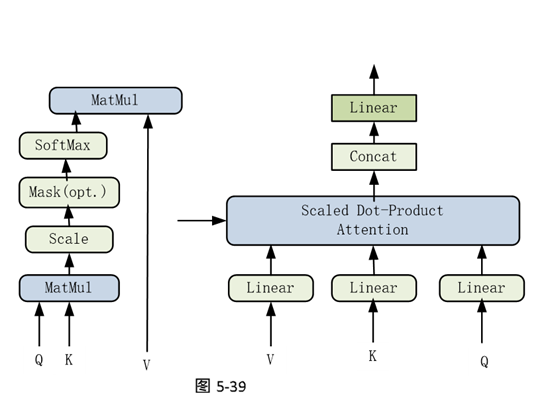

4ÔºâÂØπÂ¶ÇÂõæ5-39 Â∑¶ËæπÊâÄÁ§∫ÔºåÂØπQ„ÄÅK„ÄÅVËøõË°åÁ∫øÊÄßÂèòÊç¢„ÄÇ

In [8]:
inner_dim = 17 # ‰∏∫ÂÜÖÈÉ®Áª¥Â∫¶
linear_k = nn.Linear(embedding_dim, inner_dim)
linear_v = nn.Linear(embedding_dim, inner_dim)
linear_q = nn.Linear(embedding_dim, inner_dim)

5ÔºâÊÆµÁ∫ßÂæ™ÁéØÊú∫Âà∂  
ÊääÂΩìÂâçÂ∫èÂàó‰∏éÂâçÂ∫èÂàóËøõË°åÊãºÊé•ÔºåÊãºÊé•ÂêéÁöÑÂêëÈáè‰Ωú‰∏∫Á∫øÊÄßÂèòÊç¢ÔºàlinearÔºâÁöÑËæìÂÖ•„ÄÇÊ≥®ÊÑèÔºåÂÆÉ‰∏ç‰∏éÊü•ËØ¢ÔºàqueryÔºâËøûÊé•Âú®‰∏ÄËµ∑„ÄÇËøôÊòØÂõ†‰∏∫ÊØè‰∏™Êü•ËØ¢‰ª£Ë°®Êàë‰ª¨Ë¶ÅÈ¢ÑÊµãÁöÑ‰∏Ä‰∏™ÂçïËØç„ÄÇ

In [9]:
word_embs_w_memory = torch.cat([memory, word_embs], dim=0)
k_tfmd = linear_k(word_embs_w_memory)
v_tfmd = linear_v(word_embs_w_memory)
q_tfmd = linear_q(word_embs) # No memory for the queries

print("k_tfmdÁöÑshape:",k_tfmd.shape)
print("v_tfmdÁöÑshape:",v_tfmd.shape)
print("q_tfmdÁöÑshape:",q_tfmd.shape)

k_tfmdÁöÑshape: torch.Size([13, 3, 17])
v_tfmdÁöÑshape: torch.Size([13, 3, 17])
q_tfmdÁöÑshape: torch.Size([7, 3, 17])


6ÔºâËÆ°ÁÆóÊ≥®ÊÑèÂäõ  
Áé∞Âú®ÔºåÊàë‰ª¨ÊåâÁÖßÂ∏∏ËßÑÁöÑTransformerËÆ°ÁÆóÊåâÊØî‰æãÁº©ÊîæÁöÑÁÇπÁßØÊ≥®ÊÑèÂäõ„ÄÇ ÊåâÊØî‰æãÁº©ÊîæÁöÑÁÇπÁßØÊ≥®ÊÑèÂäõÂ∞ÜËÆ°ÁÆóÂæóÂàÜ‰Ωú‰∏∫Êü•ËØ¢ÂíåÈîÆÂêëÈáè‰πãÈó¥ÁöÑÁÇπÁßØ„ÄÇ ‰∏∫‰∫ÜÈò≤Ê≠¢ÂÄºÈöèÂêëÈáèÁª¥Êï∞ÁöÑÂ¢ûÂä†ËÄåÁàÜÁÇ∏ÔºåÊàë‰ª¨Â∞ÜÂéüÂßãÊ≥®ÊÑèÂäõÂæóÂàÜÈô§‰ª•ÂµåÂÖ•Â§ßÂ∞èÁöÑÂπ≥ÊñπÊ†π„ÄÇ
$$ \textrm{Attention}(Q, K, V) = \textrm{softmax}(\frac{QK^T}{\sqrt{d_k}})V $$

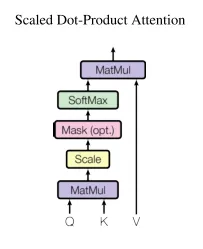

‰∏∫‰Ωø‰ª£Á†ÅÊòì‰∫éÈòÖËØªÂ∞ÜÊ≠§Â§Ñ‰ΩøÁî®einsumË°®Á§∫Ê≥ï„ÄÇeinsumÁî®‰∏Ä‰∏™Â≠óÊØçË°®Á§∫ËæìÂÖ•ÂíåËæìÂá∫ÁöÑÂΩ¢Áä∂„ÄÇ Âú®‰∏ãÈù¢ÔºåËæìÂÖ•ÁöÑÂΩ¢Áä∂‰∏∫ÔºàiÔºåbÔºådÔºâÂíåÔºàjÔºåbÔºådÔºâÔºåËæìÂá∫ÁöÑÂΩ¢Áä∂‰∏∫ÔºàiÔºåjÔºåbÔºâÔºåÂÖ∂‰∏≠Áõ∏ÂêåÁöÑÂ≠óÊØçË°®Á§∫Áõ∏ÂêåÁöÑÂ§ßÂ∞è„ÄÇ EinsumÊòØÈÄöËøáÂèñÁõ∏ÂêåÂ≠óÁ¨¶Ë∑®Áª¥Â∫¶ÁöÑÁÇπÁßØÊù•ËÆ°ÁÆóÁöÑ

In [10]:
content_attn = torch.einsum("ibd,jbd->ijb", q_tfmd, k_tfmd) / (embedding_dim ** 0.5) # scale

In [11]:
content_attn.shape

torch.Size([7, 13, 3])

ËØ∑Ê≥®ÊÑèÔºåÊàë‰ª¨Â∞öÊú™Â∫îÁî®softmaxÊøÄÊ¥ª„ÄÇ ËøôÊòØÂõ†‰∏∫Êàë‰ª¨ÈúÄË¶ÅÊõ¥Â§öÁöÑÂàÜÊï∞ÊâçËÉΩËé∑ÂæóÂÆåÊï¥ÁöÑÊ≥®ÊÑèÂäõÂæóÂàÜ„ÄÇ È¶ñÂÖàÊòØÁõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•„ÄÇ

7ÔºâËÆ°ÁÆó‰ª•‰∏ãË°®ËææÂºèÁöÑcÈ°π„ÄÇ‰ΩøÁî®‰ª•‰∏ãÁ≠âÂºèËÆ°ÁÆóÊ≥®ÊÑèÂäõÂú®‰∏Ä‰∏™queryÂêëÈáèùëûùëñÂíåkeyÂêëÈáè$k_j$.ËÆ°ÁÆóÂºè‰∏≠ÁöÑcÈ°π„ÄÇ


Transformer-XL‰∏≠ÁöÑÂÖ≥ÈîÆÊÄùÊÉ≥‰πã‰∏ÄÊòØÁõ∏ÂØπ‰ΩçÁΩÆÁºñÁ†Å„ÄÇ
Transformer-XL‰ΩøÁî®‰ª£Ë°®‰ªª‰Ωï‰∏§‰∏™Ê†áËÆ∞‰πãÈó¥**Ë∑ùÁ¶ª**ÁöÑÂµåÂÖ•ÔºåËÄå‰∏çÊòØÁî®ÁªùÂØπ‰ΩçÁΩÆÁöÑÂµåÂÖ•„ÄÇ
ËøôÁî®‰∫éËÆ°ÁÆó‰∏§‰∏™ÂçïËØç‰πãÈó¥ÁöÑÊ≥®ÊÑèÂäõ„ÄÇ

‰ΩøÁî®‰ª•‰∏ãÁ≠âÂºèËÆ°ÁÆóÊ≥®ÊÑèÂäõ(attention)Âú®‰∏Ä‰∏™queryÂêëÈáè $ q_i $ ÂíåkeyÂêëÈáè $k_j$:

\begin{align}
A^{rel}_{i,j} = 
    \underbrace{E_{x_i}^TW_q^TW_{k,E}E_{x_j}}_{(a)}
    + \underbrace{E_{x_i}^TW_q^TW_{k,R} \color{green}R_\color{green}{i-j} }_{(b)}
    \\ 
    + \underbrace{ \color{red}u^\color{red}T W_{k,E}E_{x_j}}_{(c)} 
    + \underbrace{ \color{red}v^\color{red}T W_{k,R} \color{green}R_\color{green}{i-j}}_{(d)}
\end{align}

ÂêéÁª≠ËÆ°ÁÆóÔºàbÔºâËá≥ÔºàdÔºâÈ°πÁöÑËØ¶ÁªÜÂÆûÁé∞„ÄÇ ËøôÈáåÊàë‰ª¨ÂÖàÂÆûÁé∞ÂÜÖÂÆπÂÅèÂ∑ÆÔºà‰∏äËø∞Á≠âÂºè‰∏≠ÁöÑÔºàcÔºâÈ°πÔºâÔºåÂõ†‰∏∫ÂÆÉÊúÄÂÆπÊòìËÆ°ÁÆó„ÄÇ

In [11]:
u = torch.rand(17).expand_as(q_tfmd)
content_attn = content_attn + torch.einsum("ibd,jbd->ijb", u, k_tfmd) / (embedding_dim ** 0.5)

8ÔºâËÆ°ÁÆób„ÄÅdÈ°π  
ÂÖàËÆ°ÁÆóÊâÄÈúÄÁöÑÁõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÔºåTransformer-XL‰ΩøÁî®Âõ∫ÂÆöÁöÑÊ≠£Âº¶ÂµåÂÖ•„ÄÇ

In [12]:
pos_idxs = torch.arange(seq + prev_seq - 1, -1, -1.0, dtype=torch.float)
pos_idxs

tensor([12., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.])

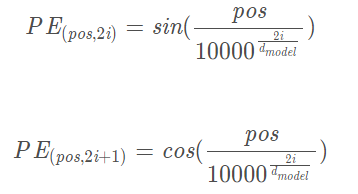

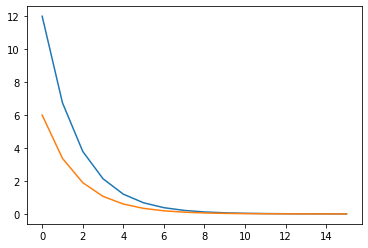

In [13]:
inv_freq = 1 / (10000 ** (torch.arange(0.0, embedding_dim, 2.0) / embedding_dim))
sinusoid_inp = torch.einsum("i,j->ij", pos_idxs, inv_freq)
plt.plot(sinusoid_inp[0, :].detach().numpy());
plt.plot(sinusoid_inp[6, :].detach().numpy());

In [14]:
torch.arange(0.0, embedding_dim, 2.0)

tensor([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
        28., 30.])

In [15]:
relative_positional_embeddings = torch.cat([sinusoid_inp.sin(), sinusoid_inp.cos()], dim=-1)[:,None,:]
relative_positional_embeddings.shape

torch.Size([13, 1, 32])

In [16]:
relative_positional_embeddings[0]

tensor([[-0.5366,  0.4483, -0.6077,  0.8456,  0.9320,  0.6247,  0.3704,  0.2118,
          0.1197,  0.0674,  0.0379,  0.0213,  0.0120,  0.0067,  0.0038,  0.0021,
          0.8439,  0.8939, -0.7942, -0.5338,  0.3624,  0.7808,  0.9289,  0.9773,
          0.9928,  0.9977,  0.9993,  0.9998,  0.9999,  1.0000,  1.0000,  1.0000]])

Êää‰ΩçÁΩÆÂµåÂÖ•ÂÆö‰πâ‰∏∫Á±ª

In [17]:
class PositionalEmbedding(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.d = d
        inv_freq = 1 / (10000 ** (torch.arange(0.0, d, 2.0) / d))
        # register buffer tells pytorch that this tensor is part of the modle
        # this means that it will be saved in the state_dict and moved to the GPU
        # along with the model
        self.register_buffer("inv_freq", inv_freq)
        
    def forward(self, positions: torch.LongTensor, # (seq, )
               ):
        # outer product
        sinusoid_inp = torch.einsum("i,j->ij", positions.float(), self.inv_freq)
        pos_emb = torch.cat([sinusoid_inp.sin(), sinusoid_inp.cos()], dim=-1)
        return pos_emb[:,None,:]

ËÆ°ÁÆóÂºèÔºà5.30ÔºâÔºàËØ∑ÂèÇËÄÉ‰π¶‰∏≠ÂØπÂ∫îÁöÑË°®ËææÂºèÔºâ‰∏≠ÁöÑbÔºådÈ°π

In [18]:
linear_p = nn.Linear(embedding_dim, inner_dim)
pos_tfmd = linear_p(relative_positional_embeddings)

Â∞Ü‰ΩçÁΩÆÂÅèÂ∑ÆÊ∑ªÂä†Âà∞Ê≥®ÊÑèÂäõËÆ°ÁÆóËøáÁ®ã‰∏≠

In [19]:
v = torch.rand(17) # positional bias
pos_attn = torch.einsum("ibd,jd->ijb", q_tfmd + v, pos_tfmd[:,0,:]) / (embedding_dim ** 0.5) # scale
pos_attn.shape

torch.Size([7, 13, 3])

‰∏äËø∞‰ª£Á†Å‰ΩøÁî®Áõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÊñπÊ≥ï‰ΩøÊ≥®ÊÑèÂäõÁöÑËÆ°ÁÆóÂ§çÊùÇÂ∫¶‰∏∫O(n^2)„ÄÇÂà©Áî®‰∏ãÈù¢Ëøô‰∏™ÊñπÊ≥ïÔºåÂç≥ÈÄöËøáËÆ°ÁÆó‰∏Ä‰∏™queryÁöÑattentionÔºåÁÑ∂Âêé‰∏∫‰∏çÂêåquery‰ΩçÁΩÆËΩ¨ÁßªÂÖ∂ÂµåÂÖ•ÔºåÂèØÂ∞ÜÊó∂Èó¥Â§çÊùÇÂ∫¶ÂáèÂ∞ëÂà∞O(n)„ÄÇ

In [20]:
zero_pad = torch.zeros((seq, 1, batch_size), dtype=torch.float)
# this padding + shifting efficiently computes the attention for all 
pos_attn = (torch.cat([zero_pad, pos_attn], dim=1)
                    .view(seq + prev_seq + 1, seq, batch_size)[1:]
                    .view_as(pos_attn)) 

9ÔºâËÆ°ÁÆóÊÄªÁöÑattention scoreÔºåÂç≥ËÆ°ÁÆó‰∏äÊñáÂºèÔºà5.30ÔºâÊàñÔºà5.33ÔºâÁöÑÂÆåÊï¥Ë°®ËææÂºè„ÄÇ  
ËøôÈáåÊ∂âÂèäÁöÑÂºèÔºà5.30ÔºâÁ≠âÔºåËØ∑ÂèÇËÄÉ‰π¶‰∏≠ÂØπÂ∫îÁöÑË°®ËææÂºè„ÄÇ

In [21]:
raw_attn = content_attn + pos_attn

10ÔºâËÆ°ÁÆóvalueÁöÑÂä†ÊùÉÂíå  
	Âú®ËøõË°åËØ≠Ë®ÄÂª∫Ê®°Êó∂ÔºåÈúÄË¶ÅÈòªÊ≠¢Ê®°ÂûãÊü•ÁúãÂÆÉÂ∫îËØ•È¢ÑÊµãÁöÑÂçïËØç„ÄÇÂú®Transformer‰∏≠ÔºåÊàë‰ª¨ÈÄöËøáÂ∞Üattention scoreËÆæÁΩÆ‰∏∫0Êù•ÂÆûÁé∞Ëøô‰∏ÄÁÇπ„ÄÇËøôÂ∞ÜÊé©ÁõñÊàë‰ª¨‰∏çÂ∏åÊúõÊ®°ÂûãÁúãÂà∞ÁöÑÂ≠ó„ÄÇ

In [22]:
mask = torch.triu(
    torch.ones((seq, seq + prev_seq)),diagonal=1 + prev_seq,).bool()[...,None]
raw_attn = raw_attn.masked_fill(mask, -float('inf'))

‰∏ãÂàó‰ª£Á†ÅÂØπÂ∫îÂºèÔºà5.34ÔºâÁöÑÂÜÖÂÆπ„ÄÇ

In [23]:
attn = torch.softmax(raw_attn, dim=1)
attn_weighted_sum = torch.einsum("ijb,jbd->ibd", attn, v_tfmd)
attn_weighted_sum.shape

torch.Size([7, 3, 17])

11ÔºâÂ±ÇÁöÑÊ†áÂáÜÂåñ  
Â∞ÜÊ≥®ÊÑèÂäõÂä†ÊùÉÂíåËΩ¨Êç¢‰∏∫ÂÖ∂ÂéüÊù•ÁöÑÁª¥Â∫¶ÔºåÂπ∂‰ΩøÁî®ÊÆãÂ∑ÆËøûÊé•Â±ÇÂíåÂ±ÇÊ†áÂáÜÂåñ„ÄÇËøôÈÉ®ÂàÜÂØπÂ∫îÂºèÔºà5.35ÔºâÁöÑÁõ∏Â∫îÂÜÖÂÆπ„ÄÇ

In [24]:
linear_out = nn.Linear(inner_dim, embedding_dim)
layer_norm = nn.LayerNorm(embedding_dim)
output = layer_norm(word_embs + linear_out(attn_weighted_sum))
output.shape

torch.Size([7, 3, 32])

Ëá≥Ê≠§ÔºåÂ∞±ÂÆåÊàê‰∫ÜËÆ°ÁÆóÂºèÔºà5.30ÔºâÁöÑ‰ªªÂä°ÔºåÊé•‰∏ãÊù•ÂÆûÁé∞Â§öÂ§¥Ê≥®ÊÑèÂäõÊû∂ÊûÑ„ÄÇ

## 5.6.2ÊûÑÂª∫MultiHeadAttention
ÁªìÂêà‰∏äËø∞‰ª£Á†ÅÊ®°ÂùóÔºåÂ¢ûÂä†dropoutÂ±ÇÔºåÂèØÂæóÂà∞MultiHeadAttentionÊ®°Âùó„ÄÇ

In [25]:
from typing import *

class MultiHeadAttention(nn.Module):
    def __init__(self, d_input: int, d_inner: int, n_heads: int=4, 
                 dropout: float=0.1, dropouta: float=0.):
        super().__init__()
        self.d_input = d_input
        self.d_inner = d_inner
        self.n_heads = n_heads
        # Ê≠§Â±ÇÂ∫îÁî®Á∫øÊÄßÂèòÊç¢
        # ‰∏∫‰∫ÜÊèêÈ´òÊïàÁéáÔºåÂêåÊó∂‰∏∫ÊâÄÊúâÁöÑÂ§¥ËÆæÁΩÆÈîÆÂíåÂÄº
        self.linear_kv = nn.Linear(
            d_input, 
            (d_inner * n_heads * 2), # 2Ë°®Á§∫keyÂíåvalue
            bias=False, #‰∏∫ÁÆÄ‰æøËµ∑ËßÅÔºåËøôÈáå‰∏çÊòØÊúâÂÅèÂ∑Æ
        )
        # query‰∏ç‰∏émemory Áä∂ÊÄÅÂçïÁã¨ËøûÊé•
        self.linear_q = nn.Linear(
            d_input, d_inner * n_heads,
            bias=False
        )
        # ‰∏∫‰ΩçÁΩÆÂµåÂÖ•ÔºàembeddingsÔºâ
        self.linear_p = nn.Linear(
            d_input, d_inner * n_heads,
            bias=False
        )
        self.scale = 1 / (d_inner ** 0.5) 
        self.dropa = nn.Dropout(dropouta)
        # ËΩ¨Êç¢‰∏∫ËæìÂÖ•Áª¥Â∫¶
        self.lout = nn.Linear(self.d_inner * self.n_heads, self.d_input, bias=False)
        self.norm = nn.LayerNorm(self.d_input)
        self.dropo = nn.Dropout(dropout)
        
    def _rel_shift(self, x):
        zero_pad = torch.zeros((x.size(0), 1, *x.size()[2:]),
                               device=x.device, dtype=x.dtype)
        return (torch.cat([zero_pad, x], dim=1)
                    .view(x.size(1) + 1, x.size(0), *x.size()[2:])[1:]
                    .view_as(x)) 
        
    def forward(self, input_: torch.FloatTensor, # (cur_seq, b, d_in)
                pos_embs: torch.FloatTensor, # (cur_seq + prev_seq, d_in)
                memory: torch.FloatTensor, # (prev_seq, b, d_in)
                u: torch.FloatTensor, # (H, d)
                v: torch.FloatTensor, # (H, d)
                mask: Optional[torch.FloatTensor]=None,
        ):
        """
        pos_embsÔºöÂõ†‰∏∫ÈúÄË¶ÅÂ§ÑÁêÜÁõ∏ÂØπ‰ΩçÁΩÆÔºåÊâÄ‰ª•Êàë‰ª¨ÂçïÁã¨‰º†ÈÄí‰ΩçÁΩÆÂµåÂÖ•
        ËæìÂÖ•ÂΩ¢Áä∂ÔºöÔºàseqÔºåbsÔºåself.d_inputÔºâ
        pos_embs ÂΩ¢Áä∂ÔºöÔºàseq+prev_seqÔºåbsÔºåself.d_inputÔºâ
        ËæìÂá∫ÂΩ¢Áä∂ÔºöÔºàseqÔºåbsÔºåself.d_inputÔºâ
        """
        cur_seq = input_.shape[0] # ÂΩìÂâçÊÆµÂ∫èÂàóÈïøÂ∫¶
        prev_seq = memory.shape[0] # Ââç‰∏ÄÊÆµÂ∫èÂàóÈïøÂ∫¶
        H, d = self.n_heads, self.d_inner
        input_with_memory = torch.cat([memory, input_], dim=0) # Ë∑®Â∫èÂàóÁª¥ËøûÊé•ÈÄíÂΩíÁºìÂ≠òÔºàmemoryÔºâ

        # Â∞ÜÁî®‰ª•‰∏ãÁ¨¶ÂêàÊù•Ë°®Á§∫Âº†ÈáèÂΩ¢Áä∂
        # cs: current sequence length, b: batch, H: number of heads
        # d: inner dimension, ps: previous sequence length
        # ÂΩìÂâçÈîÆÂíåÂÄºÂèñÂÜ≥‰∫éÂâçÈù¢ÁöÑ‰∏ä‰∏ãÊñá
        k_tfmd, v_tfmd = \
            torch.chunk(self.linear_kv(input_with_memory), 2, dim=-1) # (cs + ps, b, H * d)
        q_tfmd = self.linear_q(input_) # (cs, b, H * d)

        # apply scaled dot product attention
        # look at the following dimensions carefully, since this is the key operation
        # in the Transformer/Transformer XL architecture
        
        _, bs, _ = q_tfmd.shape
        assert bs == k_tfmd.shape[1]
        # content-based attention term ((a) + (c) in the paper)
        # this is the standard attention term in the original Transformer, except without positional embeddings
        # which are handled separately in the Transformer XL (see below)
        # here, i corresponds to the number of queries = number of current inputs/targets (seq-wise)
        # j corresponds to the number of key/values = number of vectors that we can use to compute the 
        # vector for each query
        content_attn = torch.einsum("ibhd,jbhd->ijbh", (
                (q_tfmd.view(cur_seq, bs, H, d) + # (a)
                 u), # (c): u represents the global (independent of the query)
                     # bias towards certain key/values = words
                     # Note: maybe this could be a per-attention head parameter?
                 k_tfmd.view(cur_seq + prev_seq, bs, H, d) # There is no positional information to be found here
        )) # (cs, cs + ps, b, H)
        
        # position-based attention term ((b) + (d) in the paper)
        # this attention is solely based on the position of the key/values
        # (i.e. it does not take the content of the key/values into account)
        p_tfmd = self.linear_p(pos_embs) # (cs + ps, b, H * d)
        position_attn = torch.einsum("ibhd,jhd->ijbh", (
                (q_tfmd.view(cur_seq, bs, H, d) + # (b)
                 v), # (d): v represents the global (independent of the query)
                     # bias towards certain positions
                 p_tfmd.view(cur_seq + prev_seq, H, d) # Notice there is not content information
                                                        # regarding keys and values here!
        )) # (cs, cs + ps, b, H)
        
        #  Compute positional attention efficiently
        position_attn = self._rel_shift(position_attn)
        
        # the attention is the sum of content-based and position-based attention
        attn = content_attn + position_attn

        if mask is not None and mask.any().item():
            attn = attn.masked_fill(
                mask[...,None], -float('inf'))
        attn = torch.softmax(attn * self.scale, # rescale to prevent values from exploding
                             dim=1) # normalize across the value sequence dimension
        attn = self.dropa(attn)
        
        attn_weighted_values = (torch.einsum("ijbh,jbhd->ibhd",
                                           (attn, # (cs, cs + ps, b, H)
                                            v_tfmd.view(cur_seq + prev_seq, bs, H, d), # (cs + ps, b, H, d)
                                           )) # (cs, b, H, d)
                                .contiguous() # we need to change the memory layout to make `view` work
                                .view(cur_seq, bs, H * d)) # (cs, b, H * d)

        # Project back to input dimension and add residual connection
        output = input_ + self.dropo(self.lout(attn_weighted_values))
        output = self.norm(output)
        return output

‰ΩøÁî®‰∏Ä‰∏™ÈöèÊú∫Êï∞ËøõË°åÊµãËØïÊòØÂê¶Ê≠£Á°Æ

In [26]:
mha = MultiHeadAttention(32, 17, n_heads=4)
inpt = torch.rand(7, 3, 32)
pos = torch.rand(13, 32)
mem = torch.rand(6, 3, 32)
u, v = torch.rand(4, 17), torch.rand(4, 17)
x1 = mha(inpt, pos, mem, u, v)

## 5.6.3ÊûÑÂª∫Decoder
Âú®DeocderÊ®°Âùó‰∏≠ÔºåÈô§‰∫ÜMultiHeadAttentionÂ±ÇÂ§ñÔºåËøòÈúÄË¶ÅFFN„ÄÇ

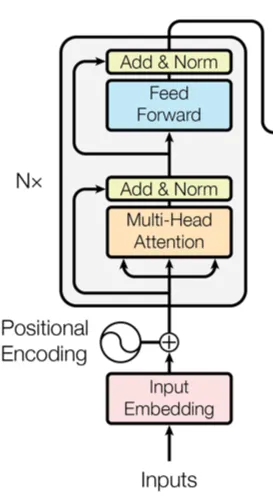

In [27]:
class PositionwiseFF(nn.Module):
    def __init__(self, d_input, d_inner, dropout):
        super().__init__()

        self.d_input = d_input
        self.d_inner = d_inner
        self.dropout = dropout
        self.ff = nn.Sequential(
            nn.Linear(d_input, d_inner), nn.ReLU(inplace=True),
            nn.Dropout(dropout),
            nn.Linear(d_inner, d_input),
            nn.Dropout(dropout),
        )
        self.layer_norm = nn.LayerNorm(d_input)

    def forward(self, input_: torch.FloatTensor, # (cur_seq, bs, d_input)
               ) -> torch.FloatTensor: # (cur_seq, bs, d_input)
        ff_out = self.ff(input_)
        output = self.layer_norm(input_ + ff_out)
        return output

ÊûÑÂª∫DecoderÊ®°Âùó‰ª£Á†ÅÂ¶Ç‰∏ãÔºö

In [28]:
class DecoderBlock(nn.Module):
    def __init__(self, n_heads, d_input, 
                 d_head_inner, d_ff_inner,
                 dropout, dropouta=0.):
        super().__init__()
        self.mha = MultiHeadAttention(d_input, d_head_inner, n_heads=n_heads, 
                                      dropout=dropout, dropouta=dropouta)
        self.ff = PositionwiseFF(d_input, d_ff_inner, dropout)
            
    def forward(self, input_: torch.FloatTensor, # (cur_seq, bs, d_input)
                pos_embs: torch.FloatTensor, # (cur_seq + prev_seq, d_input),
                u: torch.FloatTensor, # (H, d_input), 
                v: torch.FloatTensor, # (H, d_input),
                mask=None,
                mems=None,
               ):
        return self.ff(self.mha(input_, pos_embs, mems, u, v, mask=mask))

## ÊûÑÂª∫Transformer XLÁöÑÂÆåÊï¥‰ª£Á†ÅÂ¶Ç‰∏ã

Áé∞Âú®Êúâ‰∫Ü‰∏äËø∞Ê®°ÂùóÔºåÊàë‰ª¨Â∞±ÂèØ‰ª•ÊûÑÂª∫ÂÆåÊï¥ÁöÑTransformer-XLÊ®°Âûã‰∫Ü„ÄÇ
Èô§‰∫Ü‰∏äÈù¢ÊèêÂà∞ÁöÑÔºåÊàë‰ª¨ËøòÊ≤°ÊúâÊ∂âÂèäÂà∞ÁöÑËØ≠Ë®ÄÂª∫Ê®°ÁöÑ‰∏Ä‰∏™Â∏∏ËßÅÊäÄÂ∑ßÊòØÂ∞ÜËæìÂÖ•ÂµåÂÖ•Áü©ÈòµEÂíåËæìÂá∫ÊäïÂΩ±Áü©ÈòµPÁªëÂÆöÂú®‰∏ÄËµ∑„ÄÇËØ∑ËÆ∞‰ΩèÔºåËØ≠Ë®ÄÊ®°ÂûãÈ¢ÑÊµãÂ∫èÂàó‰∏≠ÁöÑ‰∏ã‰∏Ä‰∏™tokenÔºåÂõ†Ê≠§ÂÆÉÁöÑËæìÂá∫Áª¥Â∫¶ÊòØ$\mathbb{R}^{|V|}$ÔºåÂÖ∂‰∏≠$|V|$ÊòØvocabÁöÑÂ§ßÂ∞è„ÄÇÂ¶ÇÊûúÊàë‰ª¨Â∞ÜÂÄíÊï∞Á¨¨‰∫åÂ±ÇÁöÑËæìÂá∫Á∫¶Êùü‰∏∫‰∏éÂµåÂÖ•Â±Ç$d$Áõ∏ÂêåÁöÑÁª¥Â∫¶ÔºåÂàôÂµåÂÖ•Áü©Èòµ$E$ÁöÑshape‰∏∫$\mathbb{R}^{|V| \times d}$ÔºåËæìÂá∫ÊäïÂΩ±Áü©Èòµ$P$ÁöÑÂΩ¢Áä∂‰∏∫$\mathbb{R}^{d \times |V|}$„ÄÇ
Â∞Ü$P = E^T$ÔºåÂèØ‰ª•ÊèêÈ´òÊÄßËÉΩÔºåÂêåÊó∂Â§ßÂ§ßÂáèÂ∞ëÊ®°ÂûãÁöÑÊÄªÂèÇÊï∞(‰ªéËÄåÂáèÂ∞ëÂÜÖÂ≠ò‰ΩøÁî®Èáè!)

In [29]:
import torch.nn.functional as F

Instead of simply using the exact same weights, we scale the embeddings by the embedding dim. This trick is included in the codebase but not mentioned in the paper as far as I can tell. If you're aware of a paper where this trick was originally introduced, please let me know!

In [30]:
class StandardWordEmbedding(nn.Module):
    def __init__(self, num_embeddings, embedding_dim,
                div_val=1, sample_softmax=False):
        super().__init__()
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.scale = embedding_dim ** 0.5

    def forward(self, input_: torch.LongTensor):
        return self.embedding(input_) * self.scale

ÂÆåÊï¥ÁöÑTransformer-XL‰ª£Á†Å‰∏∫Ôºö

In [31]:
class TransformerXL(nn.Module):
    def __init__(self, num_embeddings, n_layers, n_heads, 
                 d_model, d_head_inner, d_ff_inner,
                 dropout=0.1, dropouta=0., 
                 seq_len: int=0, mem_len: int=0):
        super().__init__()
        self.n_layers,self.n_heads,self.d_model,self.d_head_inner,self.d_ff_inner = \
            n_layers,n_heads,d_model,d_head_inner,d_ff_inner
        # Embedding layers
        self.word_embs = StandardWordEmbedding(num_embeddings, d_model)
        self.pos_embs = PositionalEmbedding(d_model)
        # Core transformer
        self.drop = nn.Dropout(dropout)
        self.layers = nn.ModuleList([DecoderBlock(n_heads, d_model, d_head_inner=d_head_inner,
                                                  d_ff_inner=d_ff_inner,
                                                  dropout=dropout, dropouta=dropouta)
                                     for _ in range(n_layers)])

        # tie weights
        self.output_projection = nn.Linear(d_model, num_embeddings)
        self.output_projection.weight = self.word_embs.embedding.weight
        self.loss_fn = nn.CrossEntropyLoss()

        self.seq_len, self.mem_len = seq_len, mem_len
        
        # u and v are global parameters: maybe changing these to per-head parameters
        # might help performance?
        self.u, self.v = (nn.Parameter(torch.Tensor(self.n_heads, self.d_head_inner)),
                          nn.Parameter(torch.Tensor(self.n_heads, self.d_head_inner)))
        
    def init_memory(self, device=torch.device("cpu")) -> torch.FloatTensor:
        return [torch.empty(0, dtype=torch.float).to(device) for _ in range(self.n_layers+1)]
    
    def update_memory(self, 
            previous_memory: List[torch.FloatTensor], 
            hidden_states: List[torch.FloatTensor],
        ):
        assert len(hidden_states) == len(previous_memory)
        mem_len, seq_len = previous_memory[0].size(0), hidden_states[0].size(0)

        # For the updated memory, we use the most recent `self.mem_len`
        # states, including the previous memory
        # In other words, if `seq_len` < `self.mem_len` some of the previous memory
        # will carry over to the next memory
        with torch.no_grad():
            new_memory = []
            end_idx = mem_len + seq_len
            beg_idx = max(0, end_idx - self.mem_len)
            for m, h in zip(previous_memory, hidden_states):
                cat = torch.cat([m, h], dim=0) # (mem_len + seq_len, bs, d)
                new_memory.append(cat[beg_idx:end_idx].detach()) # (self.mem_len, bs, d)
        return new_memory
    
    def reset_length(self, seq_len, ext_len, mem_len):
        self.seq_len = seq_len
        self.mem_len = mem_len
    
    def forward(self, idxs: torch.LongTensor, # (cs, bs)
                target: torch.LongTensor, # (cs, bs)
                memory: Optional[List[torch.FloatTensor]]=None,
               ) -> Dict[str, torch.Tensor]:
        if memory is None: 
            memory: List[torch.FloatTensor] = self.init_memory(idxs.device)
        assert len(memory) == len(self.layers) + 1
        cur_seq, bs = idxs.size()
        prev_seq = memory[0].size(0)
        
        # Construct attention mask
        dec_attn_mask = torch.triu(
            torch.ones((cur_seq, cur_seq + prev_seq)),
            diagonal=1 + prev_seq,
        ).bool()[...,None].to(idxs.device)
        
        word_embs = self.drop(self.word_embs(idxs))
        pos_idxs = torch.arange(cur_seq + prev_seq - 1, -1, -1.0, dtype=torch.float).to(word_embs.device)
        pos_embs = self.drop(self.pos_embs(pos_idxs))
        
        # Main part of forward pass
        hidden_states = [word_embs]
        layer_out = word_embs
        for mem, layer in zip(memory, self.layers):
            layer_out = layer(layer_out, pos_embs, self.u, self.v, 
                              mask=dec_attn_mask, mems=mem)
            hidden_states.append(layer_out)
        
        logits = self.output_projection(self.drop(layer_out))        
        loss = self.loss_fn(logits.view(-1, logits.size(-1)), target.view(-1))
        
        # Update memory 
        # Ensure the memory is treated as a constant
        # and we do not back propagate through them
        new_memory = self.update_memory(memory, hidden_states)
        return {"loss": loss, "logits": logits, "memory": new_memory}

ÂêåÊ†∑‰ΩøÁî®‰∏Ä‰∏™ÈöèÊú∫Êï∞ËøõË°åÊµãËØïÔºö

In [32]:
transformer = TransformerXL(1000, 4, 3, 32, 17, 71, mem_len=5)
idxs = torch.randint(1000, (5, 9))
tgts = torch.randint(1000, (5, 9))
transformer(idxs, tgts)

{'loss': tensor(24.5135, grad_fn=<NllLossBackward>),
 'logits': tensor([[[  4.6769,  -4.4158,   7.2202,  ...,  -4.1586,  -4.0474,  -3.6384],
          [  5.8343,  -1.4085,   8.6713,  ...,  -4.1945,   4.9741,  10.4019],
          [  8.0012,   5.3975,   2.7115,  ...,  -2.6029,   0.8615,   7.5525],
          ...,
          [  0.5174,  -6.6926,  -1.0452,  ...,   5.3526,   8.0582,  -5.8192],
          [  3.5405,   4.2108,   9.0763,  ...,  -5.6353,  -1.3901,  -7.4969],
          [ 12.1884,  -0.7321,  13.2210,  ...,  -0.8858,  -3.3926,   3.1558]],
 
         [[ -0.0325,  -5.6441,   9.0534,  ...,   1.2134,  -0.6264,  -5.6296],
          [  3.3756,  -6.2131,   2.4208,  ...,  -3.4027, -11.1646,  -1.4132],
          [ -3.2031,   0.9896,   3.7091,  ...,   3.7743,  -5.3513,  -2.5524],
          ...,
          [ -0.0573,   8.8922,   5.8310,  ...,   6.7687,   9.6605,  -1.1941],
          [  1.7578,  -3.3343,   3.2496,  ...,  -8.2083,   4.7141,  -3.1152],
          [  5.4503,   0.0667,   9.8985,  ...,

## ËÆ≠ÁªÉTraining the Transformer XLÔºàË°•ÂÖÖÔºâ

### 1.ËÆæÁΩÆÁî®Êù•ËÆ≠ÁªÉÊ®°ÂûãÁöÑÈÖçÁΩÆ‰ø°ÊÅØ

In [33]:
TESTING = True

In [34]:
class Config(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)
    
    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)
        
    def update(self, dct):
        for k, v in dct.items():
            self.set(k, v)

# We will use prime numbers to ensure our implementation
# is actually correct
config = Config(
    seed=101,
    debug=False,
    warmup_step=0,
    # Check default params
    min_lr=0., 
    dropouta=0.,
    clip=0.25,
    log_interval=200,
    eval_interval=100,
)

if TESTING:
    config.update(dict(
        debug=True,
        lr=0.00025,
        bs=8,
        epochs=2,
        max_step=10000, # shorten for testing
        n_layers=4,
        n_heads=3,
        d_model=32,
        d_head_inner=17,
        d_ff_inner=71,
        dropout=0.1,
        train_bptt=33,
        eval_bptt=41,
        mem_len=41,
        eval_mem_len=63,
    ))
else:
    config.update(dict(
        lr=0.0025,
        bs=22,
        epochs=2,
        max_step=400000,
        n_layers=12,
        n_heads=8,
        d_model=512,
        d_head_inner=64,
        d_ff_inner=2048,
        dropout=0.1,
        train_bptt=512,
        eval_bptt=128,
        mem_len=512,
        eval_mem_len=2100,
    ))

### 2.ÂáÜÂ§áÊï∞ÊçÆÂä†ËΩΩ

Transformer-XLÁöÑÊï∞ÊçÆÂä†ËΩΩÁ±ª‰ºº‰∫éÂü∫‰∫érnnÁöÑËØ≠Ë®ÄÊ®°ÂûãÁöÑÊï∞ÊçÆÂä†ËΩΩÔºå‰ΩÜ‰∏éÊ†áÂáÜÁöÑÊï∞ÊçÆÂä†ËΩΩÊúâÂæàÂ§ßÁöÑ‰∏çÂêå„ÄÇ

ÂÅáËÆæÊàë‰ª¨Â∞ÜËæìÂÖ•ÂàÜÊàê4‰∏™ÂçïËØçÁöÑÂ∫èÂàóËæìÂÖ•Âà∞Ê®°Âûã‰∏≠„ÄÇËØ∑ËÆ∞‰ΩèTransformer-XLÊòØÊúâÁä∂ÊÄÅÁöÑÔºåËøôÊÑèÂë≥ÁùÄÊØè‰∏™mini-batchÁöÑËÆ°ÁÆóÂ∞ÜË¢´ËΩ¨ÁßªÂà∞‰∏ã‰∏Ä‰∏™mini-batch„ÄÇÂØπ‰∫émini-batch‰∏∫1ÁöÑÊÉÖÂÜµÔºåÂ§ÑÁêÜËµ∑Êù•ÂæàÁÆÄÂçï„ÄÇÊàë‰ª¨Âè™ÊòØÊääËæìÂÖ•ÂàÜÊàêÂùóÔºåÁÑ∂ÂêéÂÉèËøôÊ†∑ËæìÂÖ•Âà∞Ê®°Âûã‰∏≠:

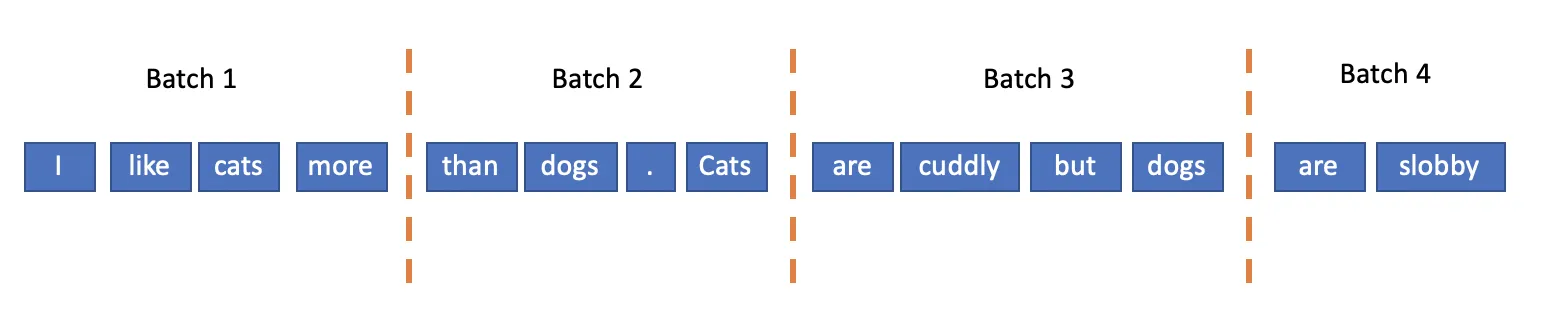

Â¶ÇÊûúÊâπÂ§ßÂ∞èÊòØ2‰ºöÂèëÁîü‰ªÄ‰πà?Êàë‰ª¨‰∏çËÉΩÂÉèËøôÊ†∑ÊãÜÂàÜÂè•Â≠êÔºåÂê¶ÂàôÔºåÊàë‰ª¨Â∞ÜÊâìÁ†¥ÁâáÊÆµ‰πãÈó¥ÁöÑ‰æùËµñÂÖ≥Á≥ª„ÄÇ

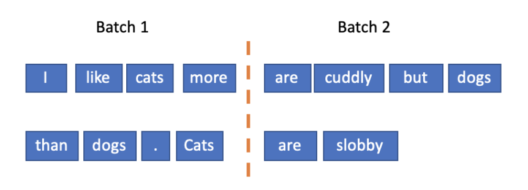

Â§ÑÁêÜbatch size‰∏∫2ÁöÑËØ≠ÊñôÂ∫ìÁöÑÊ≠£Á°ÆÊñπÊ≥ïÔºåÂ∫î‰∏∫Ôºö
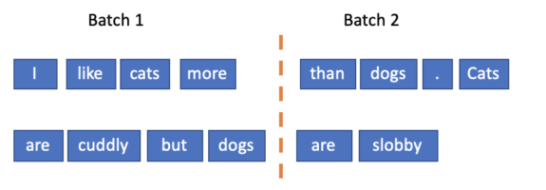

Âú®Ê≠§Âü∫Á°Ä‰∏äÔºåÊàë‰ª¨È¶ñÂÖàÂ∞ÜËØ≠ÊñôÂ∫ìÂàíÂàÜÊàêbatch sizeÁöÑÈïøÂ∫¶ÁâáÊÆµÔºåÁÑ∂ÂêéÂ∞ÜÊØè‰∏™ÁâáÊÆµÈÄêÂùóËæìÂÖ•Âà∞Ê®°Âûã‰∏≠„ÄÇËÆ©Êàë‰ª¨Êù•Áúã‰∏Ä‰∏™‰æãÂ≠ê„ÄÇÂÅáËÆæbatch size ‰∏∫4ÔºåÊàë‰ª¨ÁöÑÊï¥‰∏™ËØ≠ÊñôÂ∫ìÊòØËøôÊ†∑ÁöÑ:

Êàë‰ª¨ÊÉ≥Ë¶ÅÁ°Æ‰øùÂâç‰∏ÄbatchÂåÖÂê´Âú®Áõ∏Âêå‰ΩçÁΩÆ‰∏äÁöÑÂâç‰∏ÄÊÆµ„ÄÇÊç¢Âè•ËØùËØ¥ÔºåÂÅáËÆæÊàë‰ª¨‰∏ÄÊ¨°ÂêëÊ®°ÂûãËæìÂÖ•‰∏Ä‰∏™ÂçïËØçÔºåÊàë‰ª¨Â∏åÊúõÂÉèËøôÊ†∑Ëø≠‰ª£Ëøô‰∏™Âè•Â≠ê

ËøôÊÑèÂë≥ÁùÄÈúÄË¶Å‰ª•ÂçïËØç‰∏∫Âçï‰ΩçÔºåÈÄöËøá‰ªé‰∏äÂà∞‰∏ãÔºåÁÑ∂Âêé‰ªéÂ∑¶Âà∞Âè≥„ÄÇËÄå‰∏çÊòØÊ®™Ë°å‰ªéÂ∑¶Âà∞Âè≥ÔºåÁ∫µÂêë‰ªé‰∏äÂà∞‰∏ãÊù•ÈáçÊñ∞ÊûÑÈÄ†ÂéüÂè•Â≠ê„ÄÇÂÆûÈôÖ‰∏äÔºåÊØè‰∏™batch‰∏≠ÁöÑÂçïËØçÂ∫èÂàóÁöÑÈïøÂ∫¶ÈÄöÂ∏∏‰∏∫bptt(Êó∂Èó¥ÂèçÂêë‰º†Êí≠)ÈïøÂ∫¶ÔºåÂõ†‰∏∫ËøôÊòØÊ¢ØÂ∫¶Ê≤øÂ∫èÂàóÊñπÂêë‰º†Êí≠ÁöÑÊúÄÂ§ßÈïøÂ∫¶„ÄÇ‰æãÂ¶ÇÔºåÂΩìbpttÈïøÂ∫¶‰∏∫2Êó∂ÔºåbatchÁöÑshape‰∏∫(batch_size, bptt)Ôºö

‰ª•‰∏ã‰ª£Á†ÅÂèØ‰ª•ÊåâËøôÁßçÊñπÂºèÂä†ËΩΩÊï∞ÊçÆ„ÄÇ

In [35]:
from torch.utils import data
import math

class LMDataLoader(data.DataLoader):
    def __init__(self, data: torch.LongTensor, batch_size: int, bptt: int,
                 device=torch.device("cpu")):
        self.batch_size = batch_size
        self.bptt = bptt
        self.n_steps = data.size(0) // batch_size

        # we reshape the data here so that we can index
        # efficiently into it while training
        self.data = (data[:self.n_steps * batch_size] # trim off any elements that don't fit cleanly
                     .view(batch_size, self.n_steps) # 
                     .transpose(0, 1) # 
                     .contiguous().to(device) # put on device as contiguous tensor
                     )

    def __iter__(self):
        for batch_start_idx in range(0, self.data.size(0) - 1, self.bptt):
            batch_end_idx = min(batch_start_idx + self.bptt, self.data.size(0) - 1)
            # TODO: What is `self.ext_len` in the original code?
            batch_data = self.data[batch_start_idx:batch_end_idx]
            target = self.data[batch_start_idx+1:batch_end_idx+1]
            # we generate the sequence length as well for loss calculation later
            yield batch_data, target, batch_end_idx - batch_start_idx

    def __len__(self):
        return math.ceil(self.data.size(0) / self.bptt)

### 3.Âà©Áî®dataloaderÂØºÂÖ•Êï∞ÊçÆ

In [36]:
from torch.utils import data
import math

class LMDataLoader(data.DataLoader):
    def __init__(self, data: torch.LongTensor, batch_size: int, bptt: int,
                 device=torch.device("cpu")):
        self.batch_size = batch_size
        self.bptt = bptt
        self.n_steps = data.size(0) // batch_size
        
        # we reshape the data here so that we can index
        # efficiently into it while training
        self.data = (data[:self.n_steps * batch_size] # trim off any elements that don't fit cleanly
                     .view(batch_size, self.n_steps) # 
                     .transpose(0, 1) # 
                     .contiguous().to(device) # put on device as contiguous tensor
                     )
    
    def __iter__(self):
        for batch_start_idx in range(0, self.data.size(0) - 1, self.bptt):
            batch_end_idx = min(batch_start_idx + self.bptt, self.data.size(0) - 1)
            # TODO: What is `self.ext_len` in the original code?
            batch_data = self.data[batch_start_idx:batch_end_idx]
            target = self.data[batch_start_idx+1:batch_end_idx+1]
            # we generate the sequence length as well for loss calculation later
            yield batch_data, target, batch_end_idx - batch_start_idx
    
    def __len__(self):
        return math.ceil(self.data.size(0) / self.bptt)

### 4.ÊµãËØï‰∏Ä‰∏ãËØ•ÂáΩÊï∞

In [37]:
test_corpus = torch.arange(1000)
BS = 16
BPTT = 10
test_corpus[:BPTT]
#output: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
loader = LMDataLoader(test_corpus, BS, BPTT)
b1, *_ = next(iter(loader))
b1.shape
#output: torch.Size([10, 16])

torch.Size([10, 16])

In [38]:
b1, b2, sl = next(iter(loader))

ÊâπÊ¨°Êï∞‰∏∫16ÔºåÁæéÂõΩÊâπÊ¨°ÁöÑÂÖÉÁ¥†‰∏™Êï∞‰∏∫62ÔºåÊâÄ‰ª•‰ª•‰∏äÁªìÊûúÁ¨¶ÂêàÈ¢ÑÊúü„ÄÇ

### 5. Ë£ÖËΩΩÁúüÂÆûÊï∞ÊçÆ

In [39]:
import sys; 
DATA_DIR=r".\simple-examples\data"
from vocabulary import Vocab

In [40]:
vocab = Vocab(special=["<eos>"], lower_case=True)

vocab.count_file(DATA_DIR+"\\"+"ptb.train.txt")
vocab.count_file(DATA_DIR+"\\"+"ptb.valid.txt")
test01=vocab.count_file(DATA_DIR+"\\"+"ptb.test.txt")

In [41]:
test01[0:1]

[['no', 'it', 'was', "n't", 'black', 'monday']]

In [42]:
vocab.build_vocab()

building vocab with min_freq=0, max_size=None
final vocab size 10000 from 9999 unique tokens


In [43]:
train_dataset = vocab.encode_file(DATA_DIR +"\\"+"ptb.train.txt", ordered=True, add_eos=True)
valid_dataset = vocab.encode_file(DATA_DIR +"\\"+"ptb.valid.txt", ordered=True, add_eos=True)
test_dataset = vocab.encode_file(DATA_DIR +"\\"+"ptb.test.txt", ordered=True, add_eos=True)

In [44]:
train_iter = LMDataLoader(train_dataset, config.bs, config.train_bptt, device=device)
valid_iter = LMDataLoader(valid_dataset, config.bs, config.eval_bptt, device=device)
test_iter = LMDataLoader(test_dataset, config.bs, config.eval_bptt, device=device)

### 7.ÂàùÂßãÂåñ

In [45]:
def init_weight(weight):
    nn.init.normal_(weight, 0.0, 0.02)

def init_bias(bias):
    nn.init.constant_(bias, 0.0)
    
# Borrowed from the transformer XL repo
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        if hasattr(m, 'weight') and m.weight is not None:
            init_weight(m.weight)
        if hasattr(m, 'bias') and m.bias is not None:
            init_bias(m.bias)
    elif classname.find('Embedding') != -1:
        if hasattr(m, 'weight'):
            init_weight(m.weight)
    elif classname.find('LayerNorm') != -1:
        if hasattr(m, 'weight'):
            nn.init.normal_(m.weight, 1.0, 0.02)
        if hasattr(m, 'bias') and m.bias is not None:
            init_bias(m.bias)
    else:
        if hasattr(m, 'u'):
            init_weight(m.u)
        if hasattr(m, 'v'):
            init_weight(m.v)

### 8.ÂÆö‰πâLoopËÆ≠ÁªÉÊ®°ÂûãÂáΩÊï∞

In [46]:
import torch.optim as optim

In [47]:

import math
import time
import os
from tqdm import tqdm

loss_change = []
val_loss_change = []

def train_epoch(
    epoch: int,
    model: nn.Module, train_loader: data.DataLoader, 
    val_loader: data.DataLoader,
    optimizer: optim.Optimizer,
    scheduler,
    train_step_start=0.,
 ):
    # Turn on training mode which enables dropout.
    model.train()
    mems = None
    train_step = train_step_start
    train_loss = 0
    log_start_time = time.time()
    best_val_loss = float("inf")
    
    pbar = tqdm(train_loader, total=min(config.max_step - train_step_start, len(train_loader)))
    for batch_idx, (data, target, seq_len) in enumerate(pbar):
        model.zero_grad()
        out_dict = model(data, target, memory=mems)
        loss, mems = out_dict["loss"], out_dict["memory"]

        loss.backward()
        train_loss += loss.item()
        loss_change.append(loss.item())
        torch.nn.utils.clip_grad_norm_(model.parameters(), config.clip)
        optimizer.step()
        
        # step-wise learning rate annealing
        train_step += 1
        # linear warmup stage
        if train_step < config.warmup_step:
            curr_lr = config.lr * train_step / config.warmup_step
            optimizer.param_groups[0]['lr'] = curr_lr
        else:
            scheduler.step(train_step)
            
        if train_step % config.log_interval == 0:
            cur_loss = train_loss / config.log_interval
            elapsed = time.time() - log_start_time
            log_str = '| epoch {:3d} step {:>8d} | lr {:.3g} ' \
                      '| loss {:5.2f}'.format(
                epoch, train_step, optimizer.param_groups[0]['lr'], cur_loss)
            log_str += ' | ppl {:9.3f}'.format(math.exp(cur_loss))
            pbar.set_description(log_str)
            train_loss = 0
            log_start_time = time.time()

        if train_step % config.eval_interval == 0:
            val_loss = evaluate(model, val_loader)
            val_loss_change.append(val_loss)
            eval_start_time = time.time()

        if train_step == config.max_step:
            return train_step
    return train_step

In [48]:
def train(model, train_loader, valid_loader):
    optimizer = optim.Adam(model.parameters(), lr=config.lr)
    total_steps = min(config.max_step, len(train_loader) * config.epochs)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer,
                    total_steps, eta_min=config.min_lr)
    train_step_start = 0
    for epoch in range(config.epochs):
        if train_step_start >= config.max_step:
            break
        train_step_start = train_epoch(
            epoch,
            model,
            train_iter,
            valid_iter,
            optimizer,
            scheduler,
            train_step_start,
        )

### 9.ÂÆö‰πâLoopËÆ≠ÁªÉÊ®°ÂûãÂáΩÊï∞

In [49]:
def evaluate(model: nn.Module, val_loader: data.DataLoader):
    # Turn on evaluation mode which disables dropout.
    model.eval()
    model.reset_length(config.eval_bptt,
        0, config.eval_mem_len+config.train_bptt-config.eval_bptt)

    # Evaluation
    total_len, total_loss = 0, 0.
    with torch.no_grad():
        mems = None
        for i, (data, target, seq_len) in enumerate(val_loader):
            out_dict = model(data, target, memory=mems)
            loss, mems = out_dict["loss"], out_dict["memory"]
            total_loss += seq_len * loss.float().item()
            total_len += seq_len

    # Switch back to the training mode
    model.reset_length(config.train_bptt, 0, config.mem_len)
    model.train()
    return total_loss / total_len

In [50]:
def evaluate_final(model, val_loader):
    model.eval()
    total_len, total_loss = 0, 0.
    start_time = time.time()
    
    model.reset_length(config.eval_bptt, 0, config.eval_mem_len + config.train_bptt - config.eval_bptt)
    
    with torch.no_grad():
        mems = None
        for i, (data, target, seq_len) in enumerate(val_loader):
            out_dict = model(data, target, memory=mems)
            loss, mems = out_dict["loss"], out_dict["memory"]
            total_loss += seq_len * loss.item()
            total_len += seq_len
        total_time = time.time() - start_time
    
    model.reset_length(config.train_bptt, 0, config.mem_len)
    loss_val = total_loss / total_len
    return {"loss": loss_val, "ppl": math.exp(loss_val)}

### 10.ËÆ≠ÁªÉÊ®°Âûã

In [51]:
transformer_xl = TransformerXL(
    num_embeddings=len(vocab), n_layers=config.n_layers,
    n_heads=config.n_heads, d_model=config.d_model,
    d_head_inner=config.d_head_inner, 
    d_ff_inner=config.d_ff_inner,
    dropout=config.dropout,
    dropouta=config.dropouta,
    seq_len=config.train_bptt,
    mem_len=config.mem_len,
)
if torch.cuda.is_available(): transformer_xl.cuda()
transformer_xl.apply(weights_init);

In [52]:
train(
    transformer_xl,
    train_iter,
    valid_iter,
)

  0%|                                                                                         | 0/3522 [00:00<?, ?it/s]C:\Users\wumgapp\Anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
| epoch   0 step     3400 | lr 0.000132 | loss  6.15 | ppl   470.517: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3522/3522 [01:56<00:00, 30.32it/s]
| epoch   1 step     7000 | lr 2.41e-08 | loss  6.06 | ppl   428.670: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3522/3522 [01:55<00:00, 30.36it/s]


In [53]:
evaluate_final(transformer_xl, valid_iter)

{'loss': 5.9817616833770515, 'ppl': 396.13762286920866}

### 11.ÂèØËßÜÂåñËÆ≠ÁªÉÁªìÊûú

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

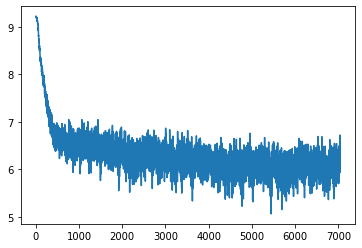

In [55]:
plt.plot(loss_change)

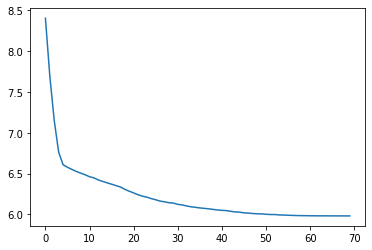

In [56]:
plt.plot(val_loss_change)